In [ ]:
!pip install regressormetricgraphplot
!pip install scipy

!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#  loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape


(100000, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
for col in diabetes_dataset.select_dtypes(include='object').columns:
    print(f"{col}: {diabetes_dataset[col].unique()}")


gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
del diabetes_dataset['smoking_history']
del diabetes_dataset['gender']


In [ ]:
# Save the DataFrame to a CSV file using to_csv
diabetes_dataset.to_csv('diabetes_dataset_modified.csv', index=False) # call the to_csv method on the dataframe and save to file


In [ ]:
mod_data= pd.read_csv('/content/diabetes_dataset_modified.csv')
print(mod_data.isnull().sum())

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
mod_data['diabetes'].value_counts()
# 1 indicating the presence of diabetes and 0 inducating not diabetes.


,count
diabetes,
0,91500
1,8500


In [ ]:
mod_data.nunique()


,0
age,102
hypertension,2
heart_disease,2
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [ ]:
mod_data.groupby('diabetes').mean(numeric_only=True)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


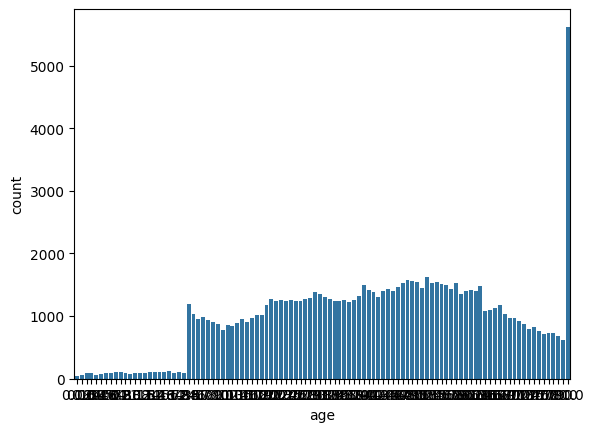

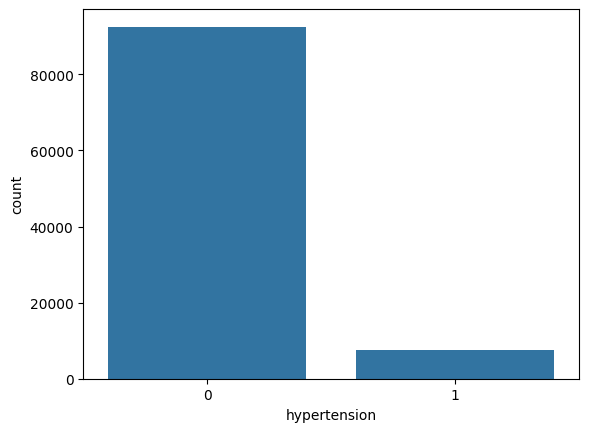

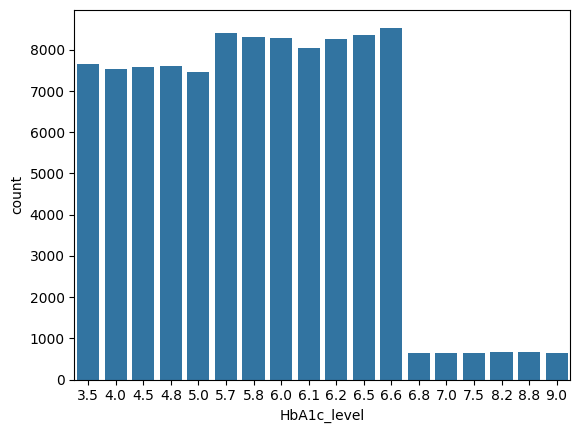

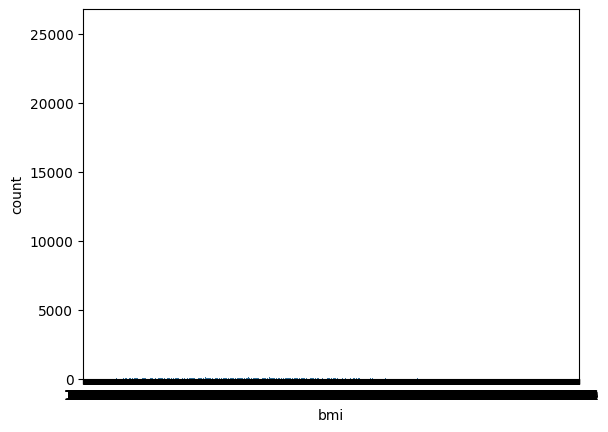

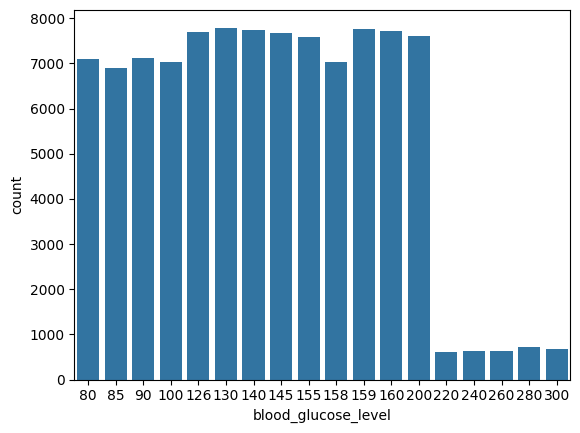

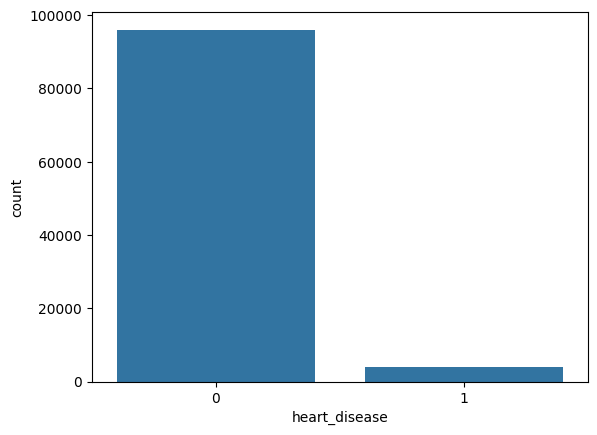

In [ ]:
sns.countplot(x='age', data=mod_data)
plt.show()

sns.countplot(x='hypertension', data=mod_data)
plt.show()

sns.countplot(x='HbA1c_level', data=mod_data)
plt.show()

sns.countplot(x='bmi', data=mod_data)
plt.show()

sns.countplot(x='blood_glucose_level', data=mod_data)
plt.show()

sns.countplot(x='heart_disease', data=mod_data)
plt.show()


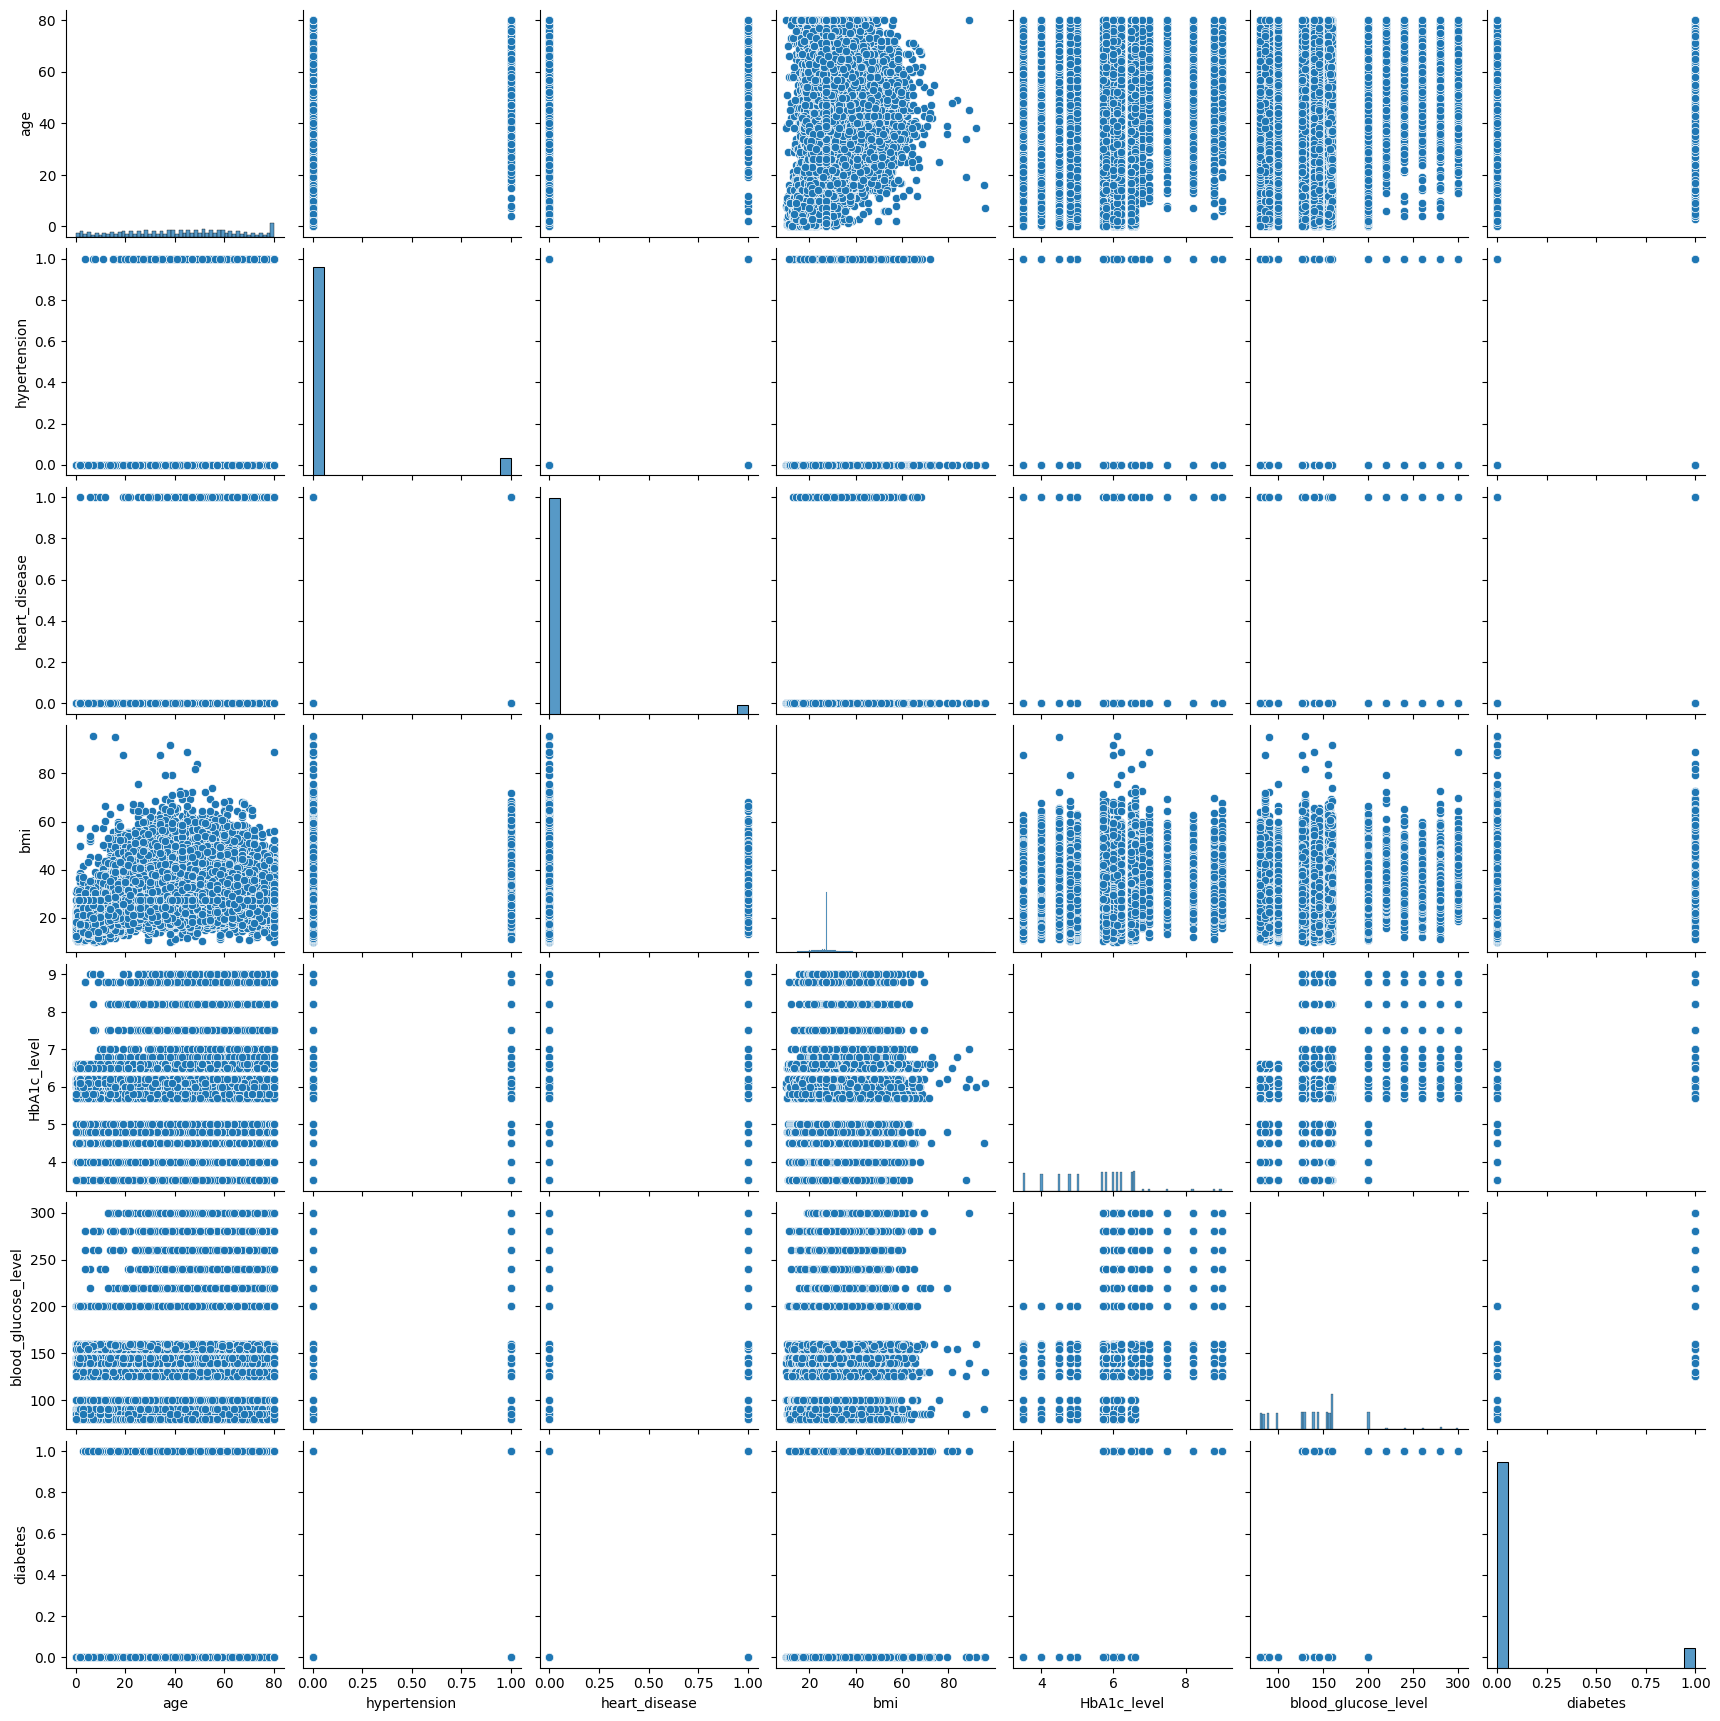

In [ ]:
sns.pairplot(mod_data)
plt.show()

SPLITTING THE DATA

In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import re
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)
from scipy.stats import pearsonr
from regressormetricgraphplot import CompareModels
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from math import sqrt

In [ ]:
# Separate features and target
# Replace 'Target' with the actual name of your target column
X = mod_data.drop('diabetes', axis=1)  # Features
y = mod_data['diabetes']               # Target


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


**KNN Model**

In [ ]:
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Make predictions
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC



In [ ]:
# Calculate evaluation metrics
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

print(f"Accuracy: {acc_knn:.2f}")
print(f"Precision: {prec_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print(f"ROC-AUC: {roc_auc_knn:.2f}")

Accuracy: 0.95
Precision: 0.88
Recall: 0.53
F1 Score: 0.66
ROC-AUC: 0.88



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18252
           1       0.88      0.53      0.66      1748

    accuracy                           0.95     20000
   macro avg       0.92      0.76      0.82     20000
weighted avg       0.95      0.95      0.95     20000



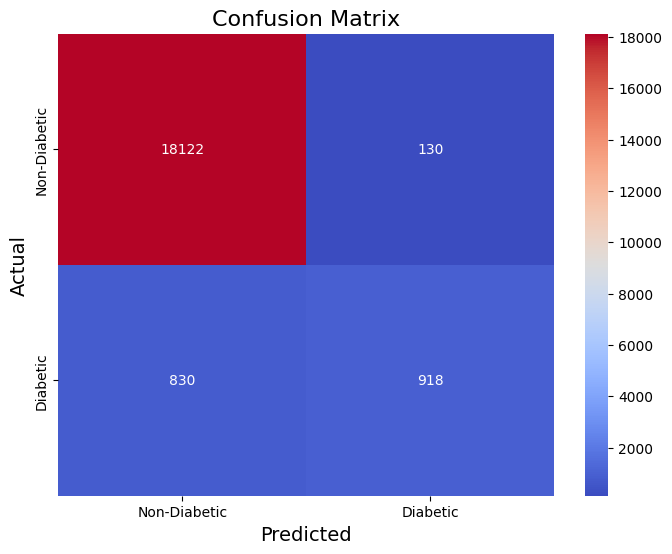

In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred_knn)
print("\nClassification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', fontsize=16)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

R (Pearson Coefficient): 0.66
R² Score: 0.40
Root Mean Squared Error (RMSE): 0.22
Mean Absolute Error (MAE): 0.05


<ipython-input-27-266baaf3d472>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='coolwarm')


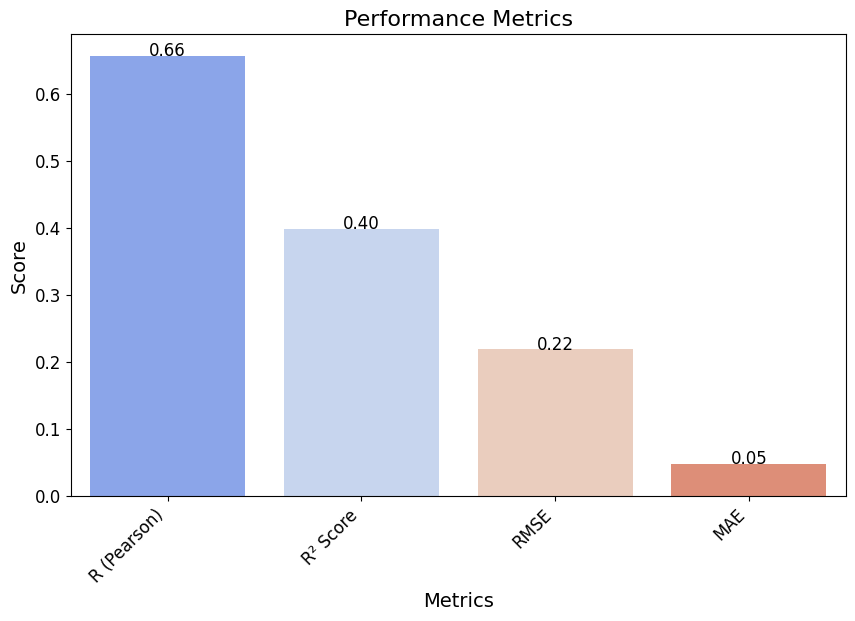

In [ ]:
# Calculate metrics
# 1. R (Pearson Coefficient)
r_knn, _ = pearsonr(y_test, y_pred_knn)
# 2. R² Score
r2_knn = r2_score(y_test, y_pred_knn)

# 3. Root Mean Squared Error (RMSE)
rmse_knn= np.sqrt(mean_squared_error(y_test, y_pred_knn))

# 4. Mean Absolute Error (MAE)
mae_knn= mean_absolute_error(y_test, y_pred_knn)

# Print the metrics
print(f"R (Pearson Coefficient): {r_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")

# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score', 'RMSE', 'MAE']
values = [r_knn, r2_knn, rmse_knn, mae_knn]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='coolwarm')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()


In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn]
})

print(metrics_table)


      Metric       KNN
0  Pearson R  0.656582
1   R2 Score  0.398204
2        MSE  0.048000
3       RMSE  0.219089
4   Accuracy  0.952000
5     Recall  0.525172
6  Precision  0.875954
7   F1 Score  0.656652


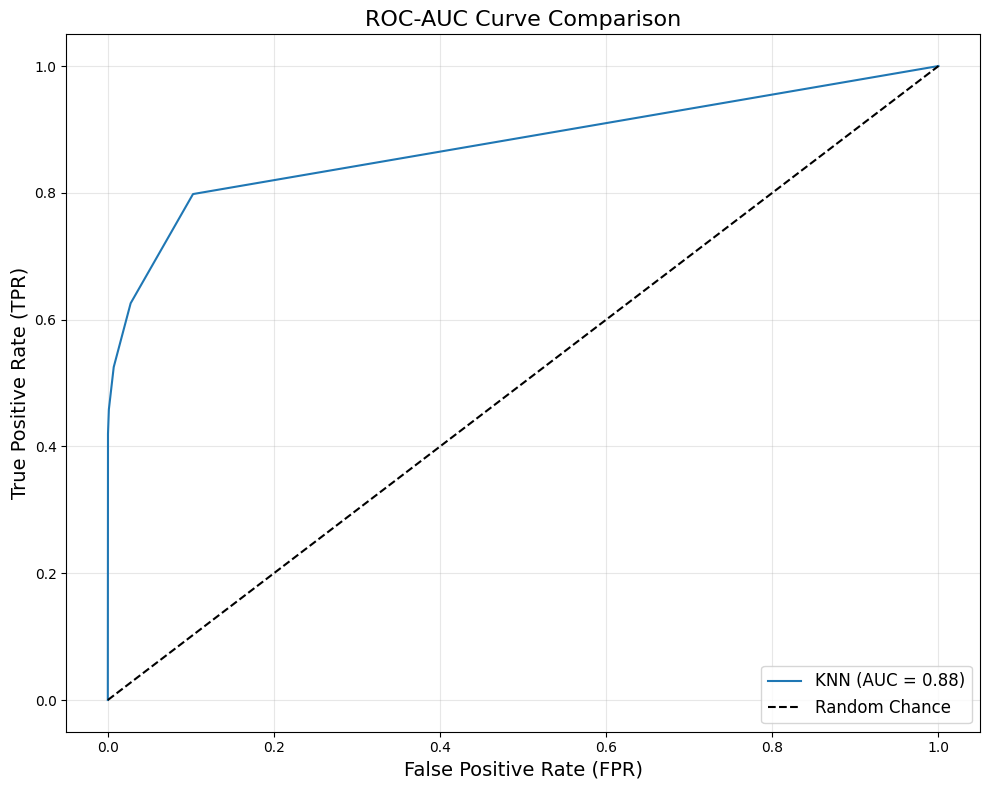

In [ ]:
# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)

**Decision Tree**

In [ ]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC




Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18252
           1       0.74      0.73      0.74      1748

    accuracy                           0.95     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.95      0.95      0.95     20000



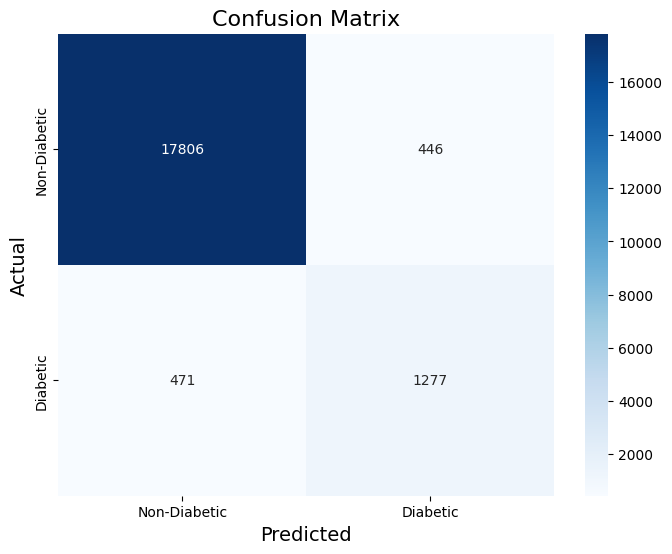

In [ ]:
 # Generate a classification report
class_report = classification_report(y_test, y_pred_dt)
print("\nClassification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()


In [ ]:
# Calculate evaluation metrics
accuracy_dt= accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Print evaluation metrics
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {prec_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"ROC-AUC: {roc_auc_dt:.2f}")

Accuracy: 0.95
Precision: 0.74
Recall: 0.73
F1 Score: 0.74
ROC-AUC: 0.86


R (Pearson Coefficient): 0.71
R² Score: 0.43
Root Mean Squared Error (RMSE): 0.21
Mean Absolute Error (MAE): 0.05


<ipython-input-35-1344cd0be709>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='flare')


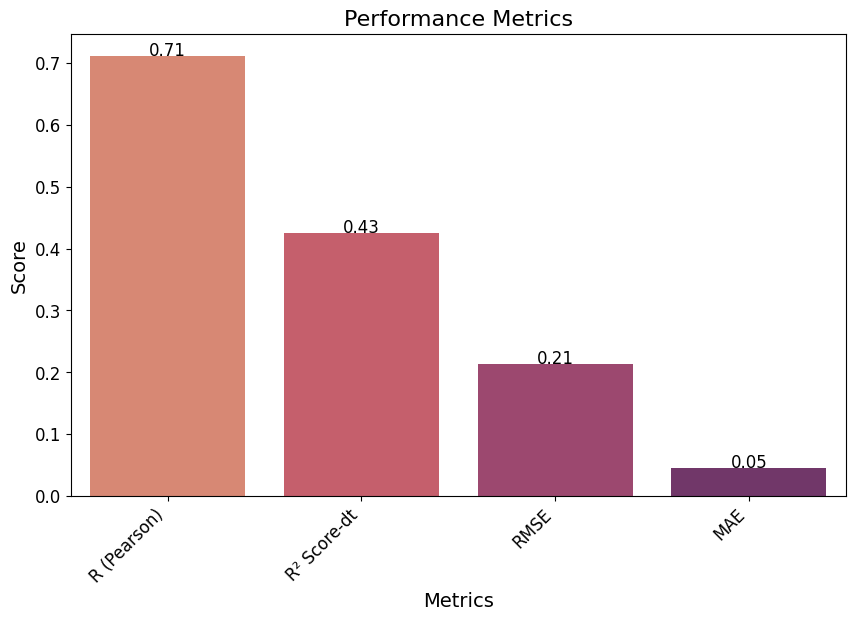

In [ ]:
# 1. R (Pearson Coefficient)
r_dt, _ = pearsonr(y_test, y_pred_dt)

# 2. R² Score
r2_dt = r2_score(y_test, y_pred_dt)

# 3.-dt Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# 4. Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print the metrics
print(f"R (Pearson Coefficient): {r_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score-dt', 'RMSE', 'MAE']
values = [r_dt, r2_dt, rmse_dt, mae_dt]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='flare')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()

In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn],
    "Decision Tree": [r_dt, r2_dt, mae_dt, rmse_dt, accuracy_dt, recall_dt, prec_dt, f1_dt]
})

print(metrics_table)

      Metric       KNN  Decision Tree
0  Pearson R  0.656582       0.710731
1   R2 Score  0.398204       0.425159
2        MSE  0.048000       0.045850
3       RMSE  0.219089       0.214126
4   Accuracy  0.952000       0.954150
5     Recall  0.525172       0.730549
6  Precision  0.875954       0.741149
7   F1 Score  0.656652       0.735811


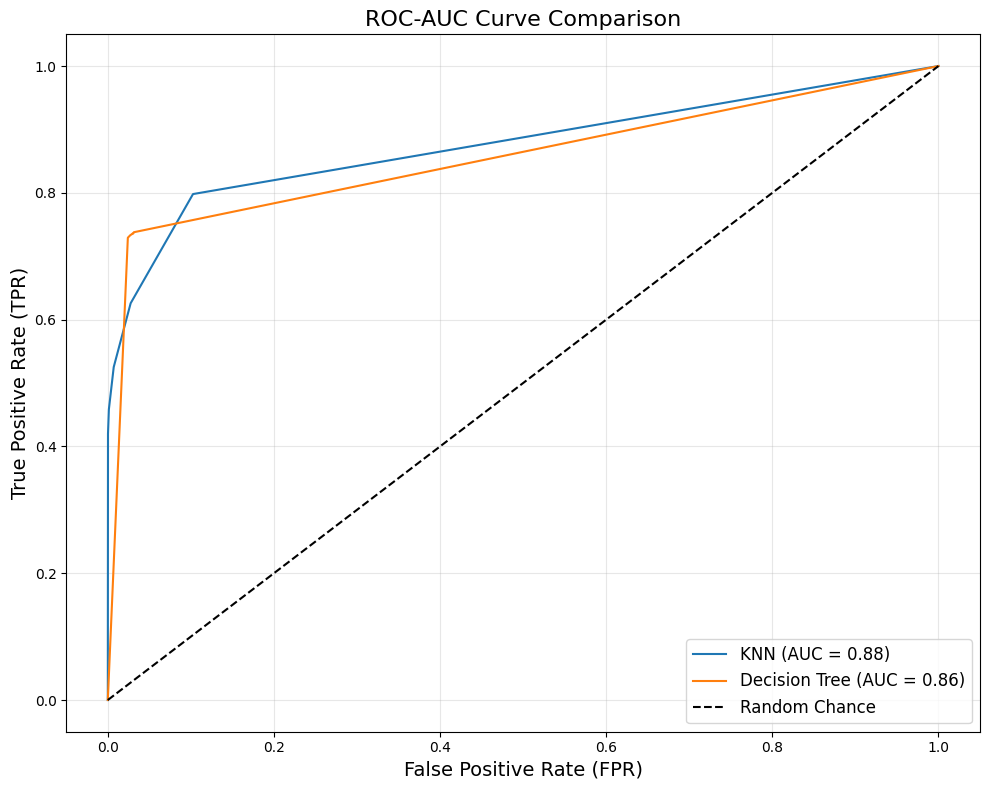

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=4))
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from math import sqrt
# Initialize the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and calculate probabilities
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score
# Calculate evaluation metrics
accuracy_nb= accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Print evaluation metrics
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {prec_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")
print(f"ROC-AUC: {roc_auc_nb:.2f}")

Accuracy: 0.90
Precision: 0.45
Recall: 0.62
F1 Score: 0.52
ROC-AUC: 0.92


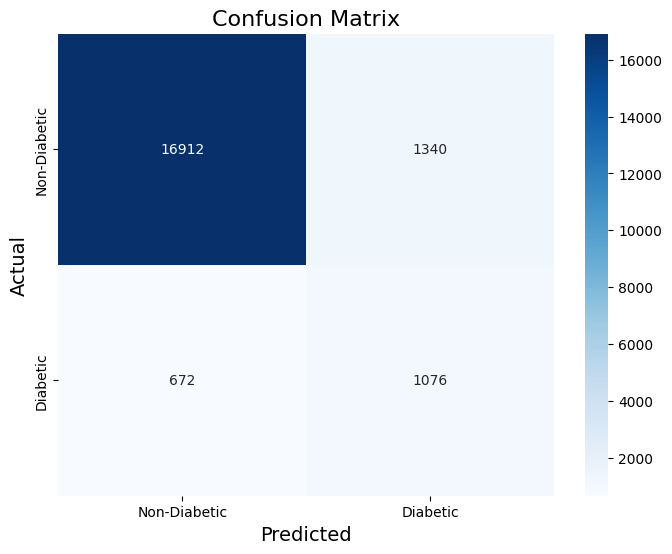

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

R (Pearson Coefficient): 0.47
R² Score: -0.26
Root Mean Squared Error (RMSE): 0.32
Mean Absolute Error (MAE): 0.10


<ipython-input-41-1a4975142aba>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='flare')


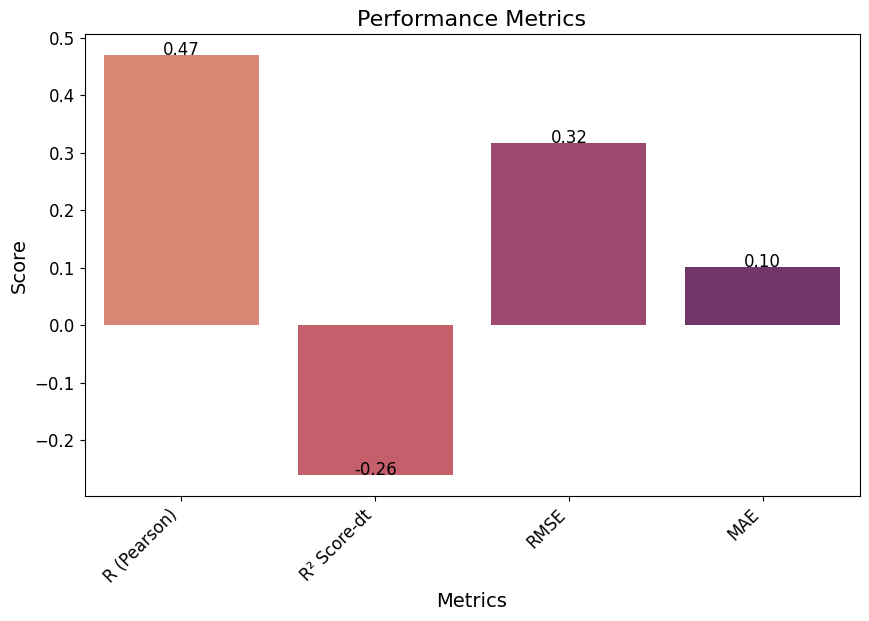

In [ ]:
# Calculate metrics
# 1. R (Pearson Coefficient)
r_nb, _ = pearsonr(y_test, y_pred_nb)

# 2. R² Score
r2_nb = r2_score(y_test, y_pred_nb)

# 3.-dt Root Mean Squared Error (RMSE)
rmse_nb = np.sqrt(mean_squared_error(y_test, y_pred_nb))

# 4. Mean Absolute Error (MAE)
mae_nb = mean_absolute_error(y_test, y_pred_nb)

# Print the metrics
print(f"R (Pearson Coefficient): {r_nb:.2f}")
print(f"R² Score: {r2_nb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_nb:.2f}")

# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score-dt', 'RMSE', 'MAE']
values = [r_nb, r2_nb, rmse_nb, mae_nb]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='flare')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()



In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn],
    "Decision Tree": [r_dt, r2_dt, mae_dt, rmse_dt, accuracy_dt, recall_dt, prec_dt, f1_dt],
    "Naive Bayes": [r_nb, r2_nb, mae_nb, rmse_nb, accuracy_nb, recall_nb, prec_nb, f1_nb]
})

print(metrics_table)

      Metric       KNN  Decision Tree  Naive Bayes
0  Pearson R  0.656582       0.710731     0.469822
1   R2 Score  0.398204       0.425159    -0.261264
2        MSE  0.048000       0.045850     0.100600
3       RMSE  0.219089       0.214126     0.317175
4   Accuracy  0.952000       0.954150     0.899400
5     Recall  0.525172       0.730549     0.615561
6  Precision  0.875954       0.741149     0.445364
7   F1 Score  0.656652       0.735811     0.516811


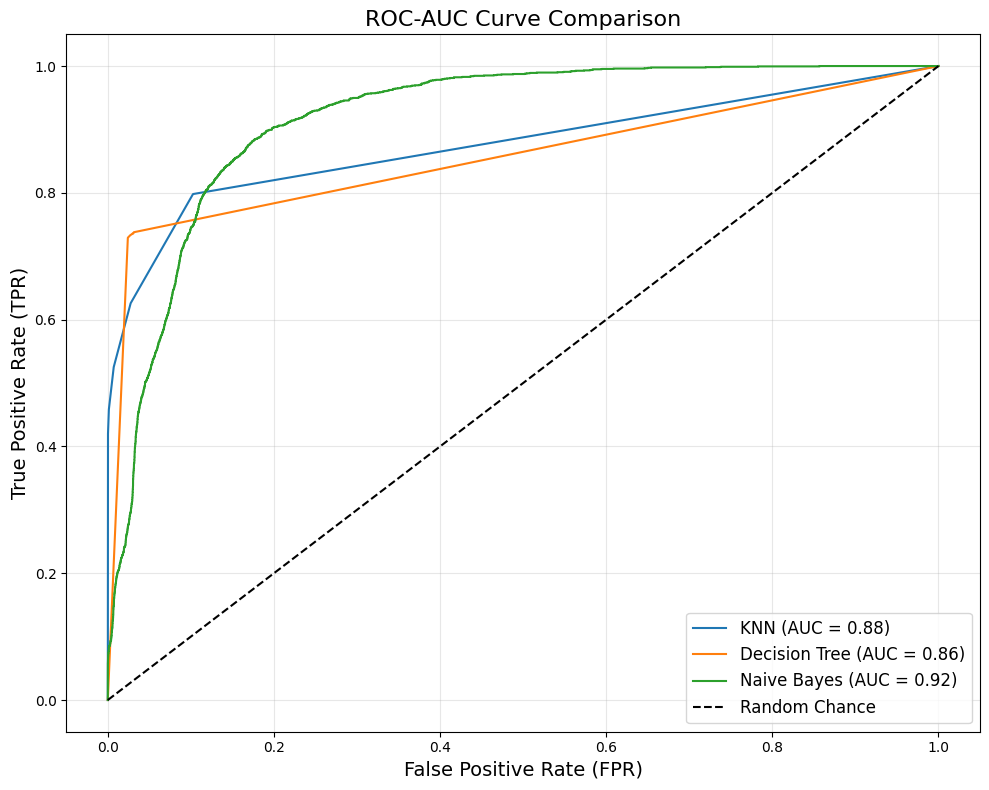

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Naive Bayes", GaussianNB())
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)

**Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=4, n_estimators=300)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import accuracy_score
# Calculate evaluation metrics
accuracy_rf= accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print evaluation metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")

Accuracy: 0.97
Precision: 0.91
Recall: 0.68
F1 Score: 0.78
ROC-AUC: 0.96


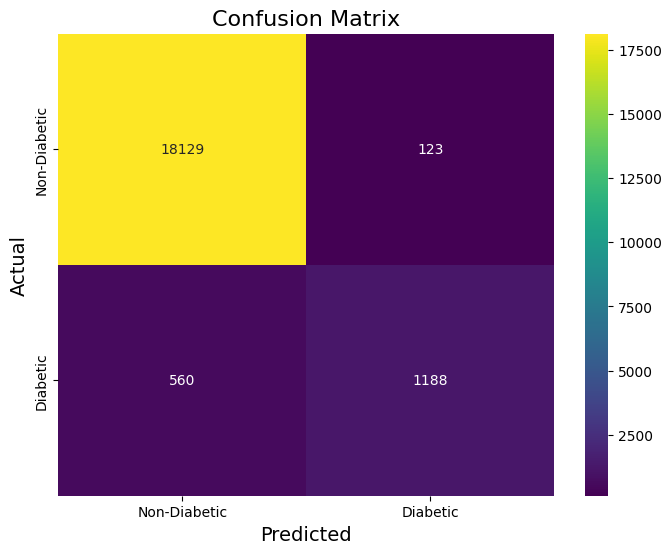

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

R (Pearson Coefficient): 0.77
R² Score: 0.57
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.03


<ipython-input-52-4e7129ce39e0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='flare')


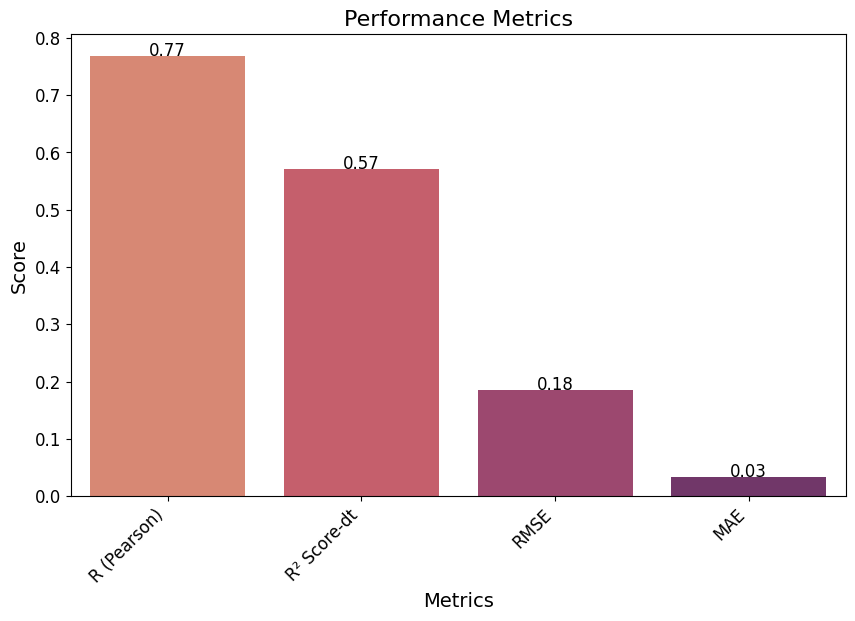

In [ ]:
# Calculate metrics
# 1. R (Pearson Coefficient)
r_rf, _ = pearsonr(y_test, y_pred_rf)

# 2. R² Score
r2_rf = r2_score(y_test, y_pred_rf)

# 3.-dt Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# 4. Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the metrics
print(f"R (Pearson Coefficient): {r_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score-dt', 'RMSE', 'MAE']
values = [r_rf, r2_rf, rmse_rf, mae_rf]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='flare')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()



In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn],
    "Decision Tree": [r_dt, r2_dt, mae_dt, rmse_dt, accuracy_dt, recall_dt, prec_dt, f1_dt],
    "Naive Bayes": [r_nb, r2_nb, mae_nb, rmse_nb, accuracy_nb, recall_nb, prec_nb, f1_nb],
    "Random Forest": [r_rf, r2_rf, mae_rf, rmse_rf, accuracy_rf, recall_rf, prec_rf, f1_rf]
})

print(metrics_table)

      Metric       KNN  Decision Tree  Naive Bayes  Random Forest
0  Pearson R  0.656582       0.710731     0.469822       0.767854
1   R2 Score  0.398204       0.425159    -0.261264       0.571847
2        MSE  0.048000       0.045850     0.100600       0.034150
3       RMSE  0.219089       0.214126     0.317175       0.184797
4   Accuracy  0.952000       0.954150     0.899400       0.965850
5     Recall  0.525172       0.730549     0.615561       0.679634
6  Precision  0.875954       0.741149     0.445364       0.906178
7   F1 Score  0.656652       0.735811     0.516811       0.776724


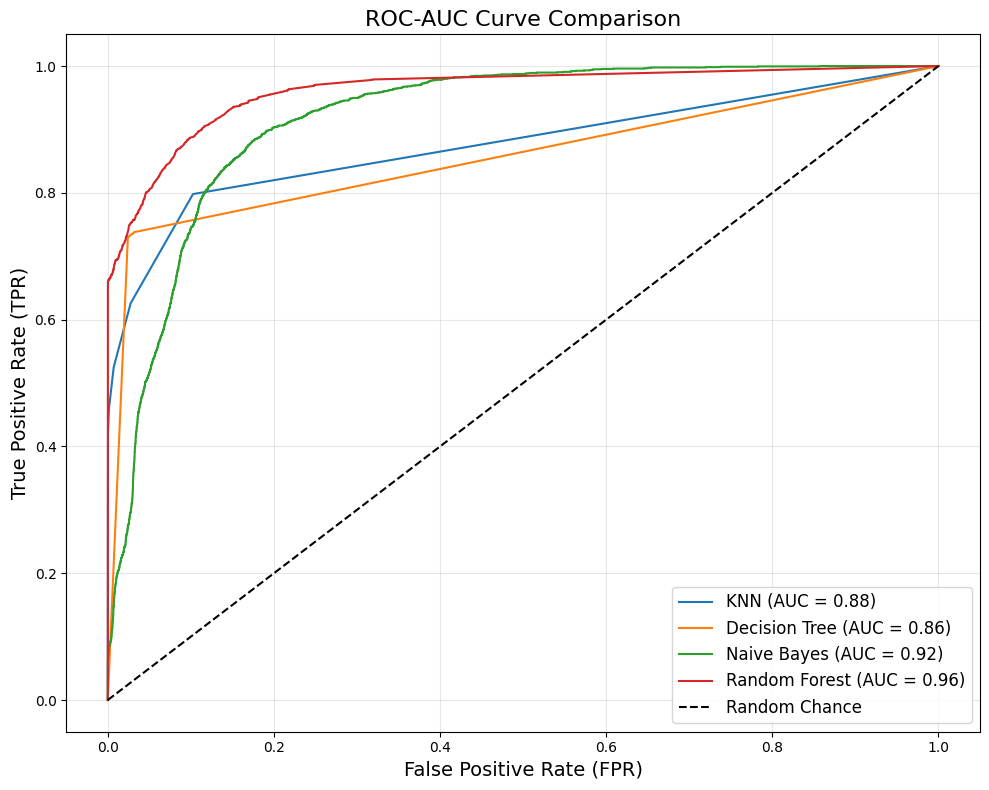

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=4, n_estimators=300))
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)

**XG Boost**

In [ ]:
from xgboost import XGBClassifier

# Train the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xg = xgb_model.predict(X_test)
y_prob_xg = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC



In [ ]:
from sklearn.metrics import accuracy_score
# Calculate evaluation metrics
accuracy_xg= accuracy_score(y_test, y_pred_xg)
prec_xg = precision_score(y_test, y_pred_xg)
recall_xg = recall_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)
roc_auc_xg = roc_auc_score(y_test, y_prob_xg)

# Print evaluation metrics
print(f"Accuracy: {accuracy_xg:.2f}")
print(f"Precision: {prec_xg:.2f}")
print(f"Recall: {recall_xg:.2f}")
print(f"F1 Score: {f1_xg:.2f}")
print(f"ROC-AUC: {roc_auc_xg:.2f}")

Accuracy: 0.97
Precision: 0.96
Recall: 0.68
F1 Score: 0.79
ROC-AUC: 0.98


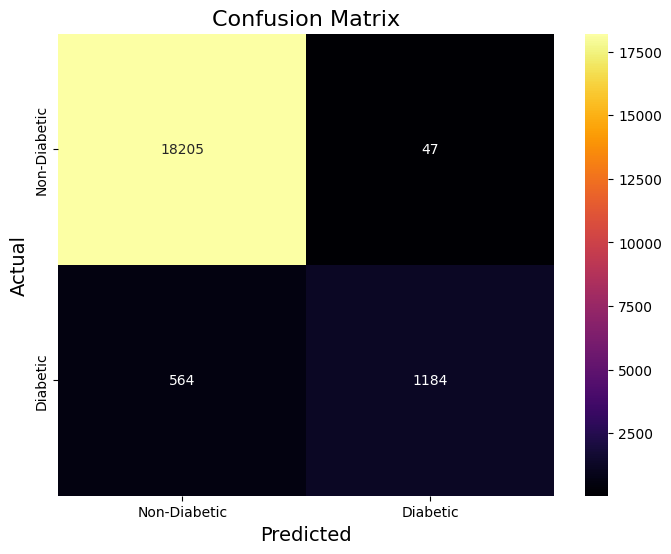

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

R (Pearson Coefficient): 0.79
R² Score: 0.62
Root Mean Squared Error (RMSE): 0.17
Mean Absolute Error (MAE): 0.03


<ipython-input-57-4f327e923edf>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='flare')


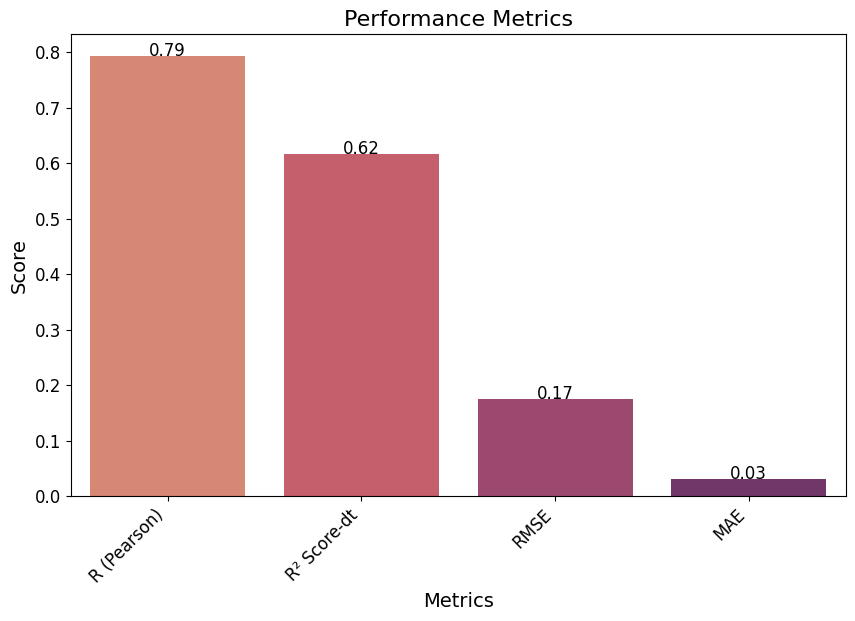

In [ ]:
# Calculate metrics
# 1. R (Pearson Coefficient)
r_xg, _ = pearsonr(y_test, y_pred_xg)

# 2. R² Score
r2_xg = r2_score(y_test, y_pred_xg)

# 3.-dt Root Mean Squared Error (RMSE)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))

# 4. Mean Absolute Error (MAE)
mae_xg = mean_absolute_error(y_test, y_pred_xg)

# Print the metrics
print(f"R (Pearson Coefficient): {r_xg:.2f}")
print(f"R² Score: {r2_xg:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xg:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xg:.2f}")

# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score-dt', 'RMSE', 'MAE']
values = [r_xg, r2_xg, rmse_xg, mae_xg]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='flare')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()



In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn],
    "Decision Tree": [r_dt, r2_dt, mae_dt, rmse_dt, accuracy_dt, recall_dt, prec_dt, f1_dt],
    "Naive Bayes": [r_nb, r2_nb, mae_nb, rmse_nb, accuracy_nb, recall_nb, prec_nb, f1_nb],
    "Random Forest": [r_rf, r2_rf, mae_rf, rmse_rf, accuracy_rf, recall_rf, prec_rf, f1_rf],
    "XGBoost": [r_xg, r2_xg, mae_xg, rmse_xg, accuracy_xg, recall_xg, prec_xg, f1_xg]
})

print(metrics_table)

      Metric       KNN  Decision Tree  Naive Bayes  Random Forest   XGBoost
0  Pearson R  0.656582       0.710731     0.469822       0.767854  0.792926
1   R2 Score  0.398204       0.425159    -0.261264       0.571847  0.616982
2        MSE  0.048000       0.045850     0.100600       0.034150  0.030550
3       RMSE  0.219089       0.214126     0.317175       0.184797  0.174786
4   Accuracy  0.952000       0.954150     0.899400       0.965850  0.969450
5     Recall  0.525172       0.730549     0.615561       0.679634  0.677346
6  Precision  0.875954       0.741149     0.445364       0.906178  0.961820
7   F1 Score  0.656652       0.735811     0.516811       0.776724  0.794898


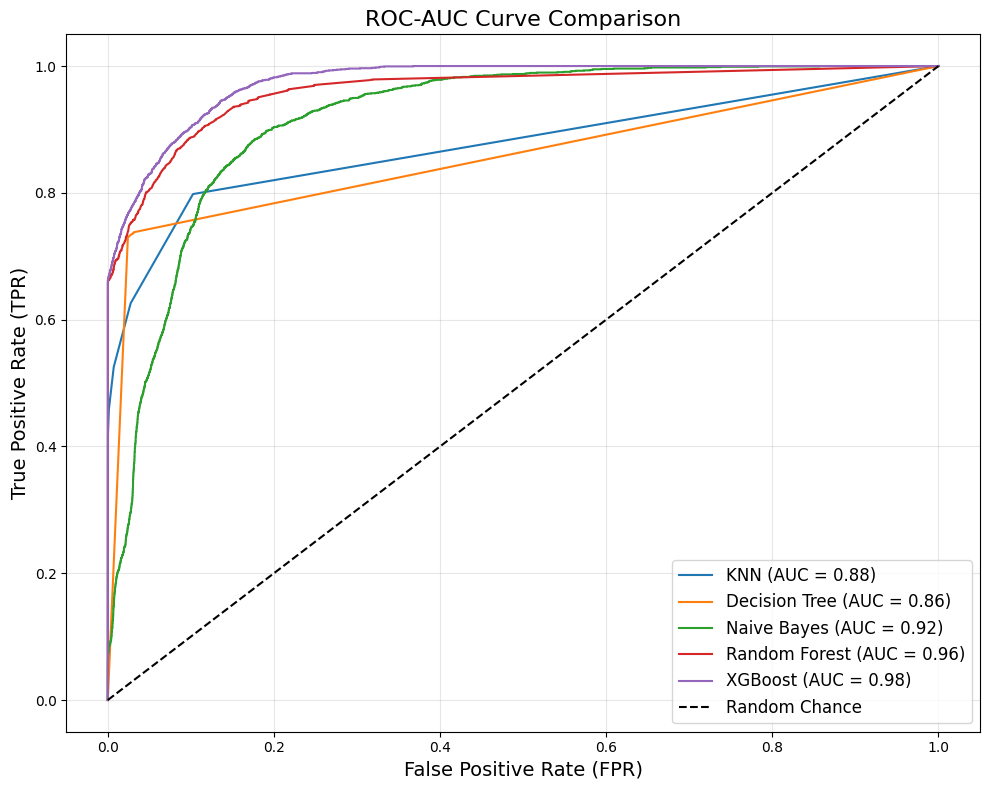

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=4, n_estimators=300)),
    ("XGBoost", XGBClassifier(random_state=42, eval_metric='logloss'))
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)

**Ridge Classifier**

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Initialize Ridge Classifier
ridge_model = RidgeClassifier()

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_rc = ridge_model.predict(X_test)

# RidgeClassifier does not have predict_proba,
# so we use decision_function to get a score
# and then scale it to a probability-like value using sigmoid
from scipy.special import expit
y_prob_rc = expit(ridge_model.decision_function(X_test))

In [ ]:
# Evaluation metrics
accuracy_rc = accuracy_score(y_test, y_pred_rc)
prec_rc = precision_score(y_test, y_pred_rc)
recall_rc = recall_score(y_test, y_pred_rc)
f1_rc = f1_score(y_test, y_pred_rc)
mse_rc = mean_squared_error(y_test, y_pred_rc)
rmse_rc = sqrt(mse_rc)
r2_rc = r2_score(y_test, y_pred_rc)
r_rc = np.corrcoef(y_test, y_pred_rc)[0, 1]

# Print evaluation metrics
print(f"R (Pearson Coefficient): {r_rc:.2f}")
print(f"R2 Score: {r2_rc:.2f}")
print(f"Mean Squared Error: {mse_rc:.2f}")
print(f"Root Mean Squared Error: {rmse_rc:.2f}")
print(f"Accuracy: {accuracy_rc:.2f}")
print(f"Precision: {prec_rc:.2f}")
print(f"Recall: {recall_rc:.2f}")
print(f"F1 Score: {f1_rc:.2f}")


R (Pearson Coefficient): 0.52
R2 Score: 0.23
Mean Squared Error: 0.06
Root Mean Squared Error: 0.25
Accuracy: 0.94
Precision: 0.99
Recall: 0.29
F1 Score: 0.45


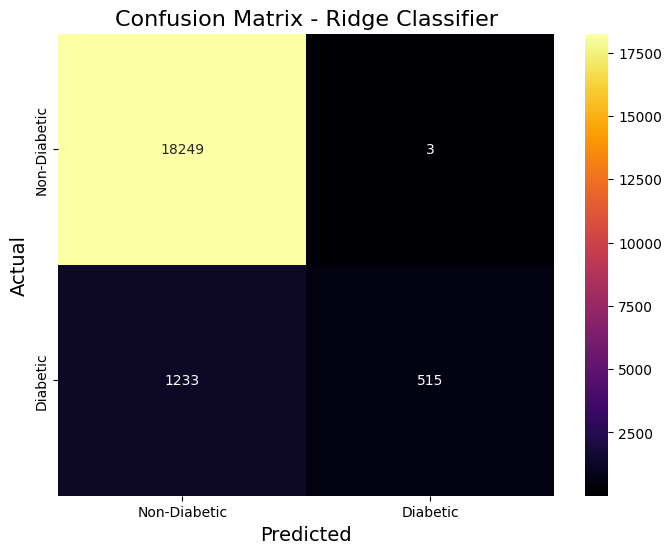

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rc)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Ridge Classifier', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

<ipython-input-66-aaac097cb306>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


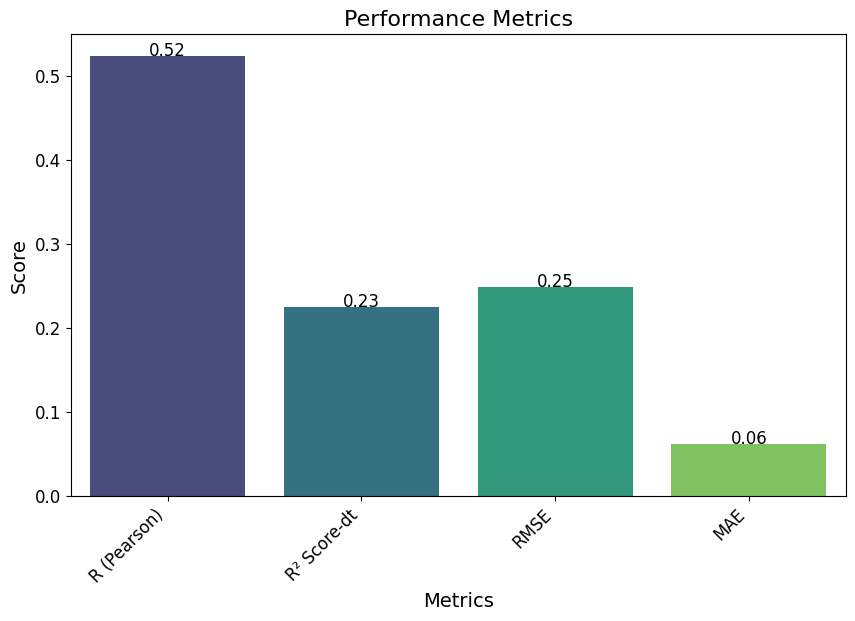

In [ ]:
# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score-dt', 'RMSE', 'MAE']
values = [r_rc, r2_rc, rmse_rc, mse_rc]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()

In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn],
    "Decision Tree": [r_dt, r2_dt, mae_dt, rmse_dt, accuracy_dt, recall_dt, prec_dt, f1_dt],
    "Naive Bayes": [r_nb, r2_nb, mae_nb, rmse_nb, accuracy_nb, recall_nb, prec_nb, f1_nb],
    "Random Forest": [r_rf, r2_rf, mae_rf, rmse_rf, accuracy_rf, recall_rf, prec_rf, f1_rf],
    "XGBoost": [r_xg, r2_xg, mae_xg, rmse_xg, accuracy_xg, recall_xg, prec_xg, f1_xg],
    "Ridge Classifier": [r_rc, r2_rc, mse_rc, rmse_rc, accuracy_rc, recall_rc, prec_rc, f1_rc]
})

print(metrics_table)

      Metric       KNN  Decision Tree  Naive Bayes  Random Forest   XGBoost  \
0  Pearson R  0.656582       0.710731     0.469822       0.767854  0.792926   
1   R2 Score  0.398204       0.425159    -0.261264       0.571847  0.616982   
2        MSE  0.048000       0.045850     0.100600       0.034150  0.030550   
3       RMSE  0.219089       0.214126     0.317175       0.184797  0.174786   
4   Accuracy  0.952000       0.954150     0.899400       0.965850  0.969450   
5     Recall  0.525172       0.730549     0.615561       0.679634  0.677346   
6  Precision  0.875954       0.741149     0.445364       0.906178  0.961820   
7   F1 Score  0.656652       0.735811     0.516811       0.776724  0.794898   

   Ridge Classifier  
0          0.523562  
1          0.225188  
2          0.061800  
3          0.248596  
4          0.938200  
5          0.294622  
6          0.994208  
7          0.454545  


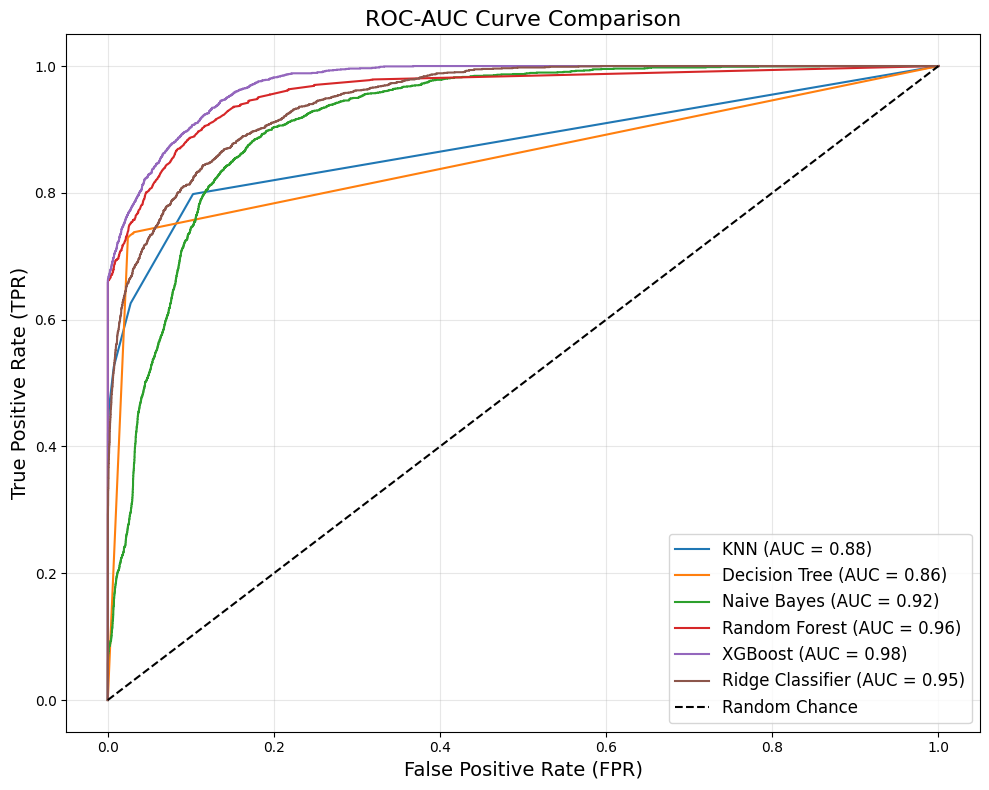

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
       # Use decision_function for RidgeClassifier and apply sigmoid
        if model_name == "Ridge Classifier":
            y_prob = expit(model.decision_function(X_test))
        else:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for other models

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=4, n_estimators=300)),
    ("XGBoost", XGBClassifier(random_state=42, eval_metric='logloss')),
    ("Ridge Classifier", RidgeClassifier())
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)

**CAT Boost**

In [ ]:
import catboost as cb
from catboost import CatBoostClassifier

# Train CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_seed=42, cat_features=[], verbose=200)
catboost_model.fit(X_train, y_train)

# Predictions
y_pred_cat = catboost_model.predict(X_test)
y_prob_cat = catboost_model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC



0:	learn: 0.5703375	total: 119ms	remaining: 1m 58s
200:	learn: 0.0758442	total: 7.87s	remaining: 31.3s
400:	learn: 0.0727063	total: 15.8s	remaining: 23.6s
600:	learn: 0.0700276	total: 24.2s	remaining: 16.1s
800:	learn: 0.0678824	total: 29.7s	remaining: 7.38s
999:	learn: 0.0659559	total: 36.3s	remaining: 0us


In [ ]:
# Evaluation Metrics
accuracy_cat= accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)
roc_auc_cat = roc_auc_score(y_test, y_prob_cat)
r2_cat = r2_score(y_test, y_pred_cat)
rmse_cat = sqrt(mean_squared_error(y_test, y_pred_cat))
mse_cat = mean_squared_error(y_test, y_pred_cat)
r_cat = np.corrcoef(y_test, y_pred_cat)[0, 1]

# Print the evaluation metrics
print(f"R (Pearson's correlation): {r_cat:.2f}")
print(f"R²: {r2_cat:.2f}")
print(f"RMSE: {rmse_cat:.2f}")
print(f"MSE: {mse_cat:.2f}")
print(f"Accuracy: {accuracy_cat:.2f}")
print(f"Precision: {precision_cat:.2f}")
print(f"Recall: {recall_cat:.2f}")
print(f"F1 Score: {f1_cat:.2f}")
print(f"ROC-AUC: {roc_auc_cat:.2f}")

R (Pearson's correlation): 0.79
R²: 0.62
RMSE: 0.17
MSE: 0.03
Accuracy: 0.97
Precision: 0.96
Recall: 0.68
F1 Score: 0.79
ROC-AUC: 0.98


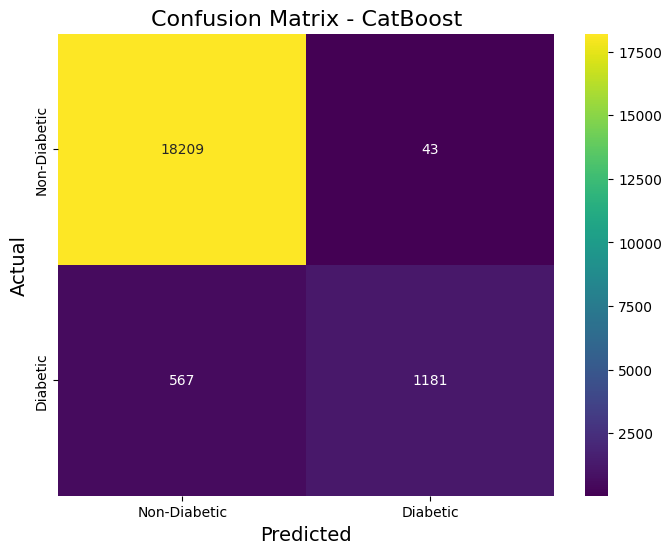

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_cat)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - CatBoost', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()


<ipython-input-73-a28474be4826>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


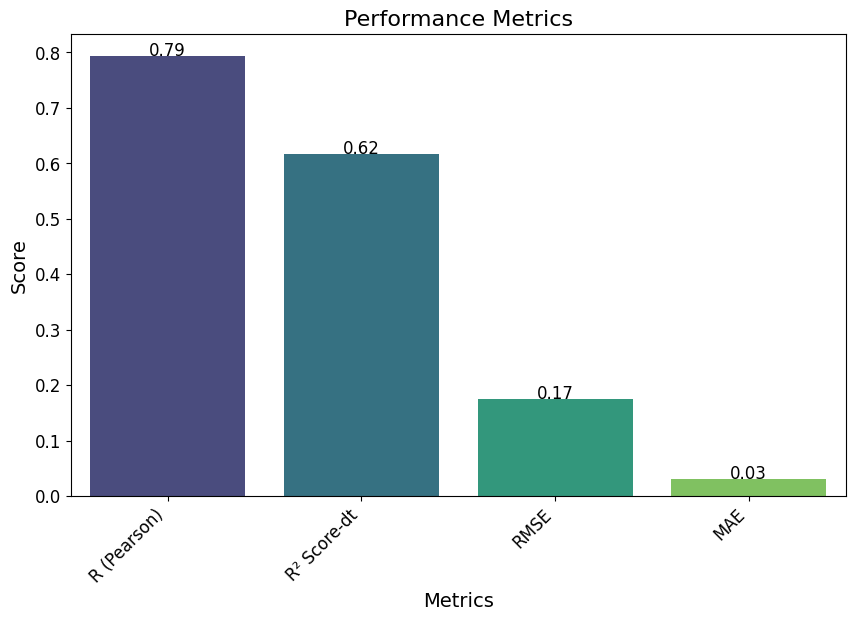

In [ ]:
# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score-dt', 'RMSE', 'MAE']
values = [r_cat, r2_cat, rmse_cat, mse_cat]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()

In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn],
    "Decision Tree": [r_dt, r2_dt, mae_dt, rmse_dt, accuracy_dt, recall_dt, prec_dt, f1_dt],
    "Naive Bayes": [r_nb, r2_nb, mae_nb, rmse_nb, accuracy_nb, recall_nb, prec_nb, f1_nb],
    "Random Forest": [r_rf, r2_rf, mae_rf, rmse_rf, accuracy_rf, recall_rf, prec_rf, f1_rf],
    "XGBoost": [r_xg, r2_xg, mae_xg, rmse_xg, accuracy_xg, recall_xg, prec_xg, f1_xg],
    "Ridge Classifier": [r_rc, r2_rc, mse_rc, rmse_rc, accuracy_rc, recall_rc, prec_rc, f1_rc],
    "CatBoost": [r_cat, r2_cat, mse_cat, rmse_cat, accuracy_cat, recall_cat, precision_cat, f1_cat]
})

print(metrics_table)


      Metric       KNN  Decision Tree  Naive Bayes  Random Forest   XGBoost  \
0  Pearson R  0.656582       0.710731     0.469822       0.767854  0.792926   
1   R2 Score  0.398204       0.425159    -0.261264       0.571847  0.616982   
2        MSE  0.048000       0.045850     0.100600       0.034150  0.030550   
3       RMSE  0.219089       0.214126     0.317175       0.184797  0.174786   
4   Accuracy  0.952000       0.954150     0.899400       0.965850  0.969450   
5     Recall  0.525172       0.730549     0.615561       0.679634  0.677346   
6  Precision  0.875954       0.741149     0.445364       0.906178  0.961820   
7   F1 Score  0.656652       0.735811     0.516811       0.776724  0.794898   

   Ridge Classifier  CatBoost  
0          0.523562  0.793278  
1          0.225188  0.617609  
2          0.061800  0.030500  
3          0.248596  0.174642  
4          0.938200  0.969500  
5          0.294622  0.675629  
6          0.994208  0.964869  
7          0.454545  0.794751  


0:	learn: 0.5703375	total: 32.9ms	remaining: 32.9s
200:	learn: 0.0758442	total: 10.5s	remaining: 41.6s
400:	learn: 0.0727063	total: 19.8s	remaining: 29.6s
600:	learn: 0.0700276	total: 27s	remaining: 17.9s
800:	learn: 0.0678824	total: 32.9s	remaining: 8.17s
999:	learn: 0.0659559	total: 38.5s	remaining: 0us


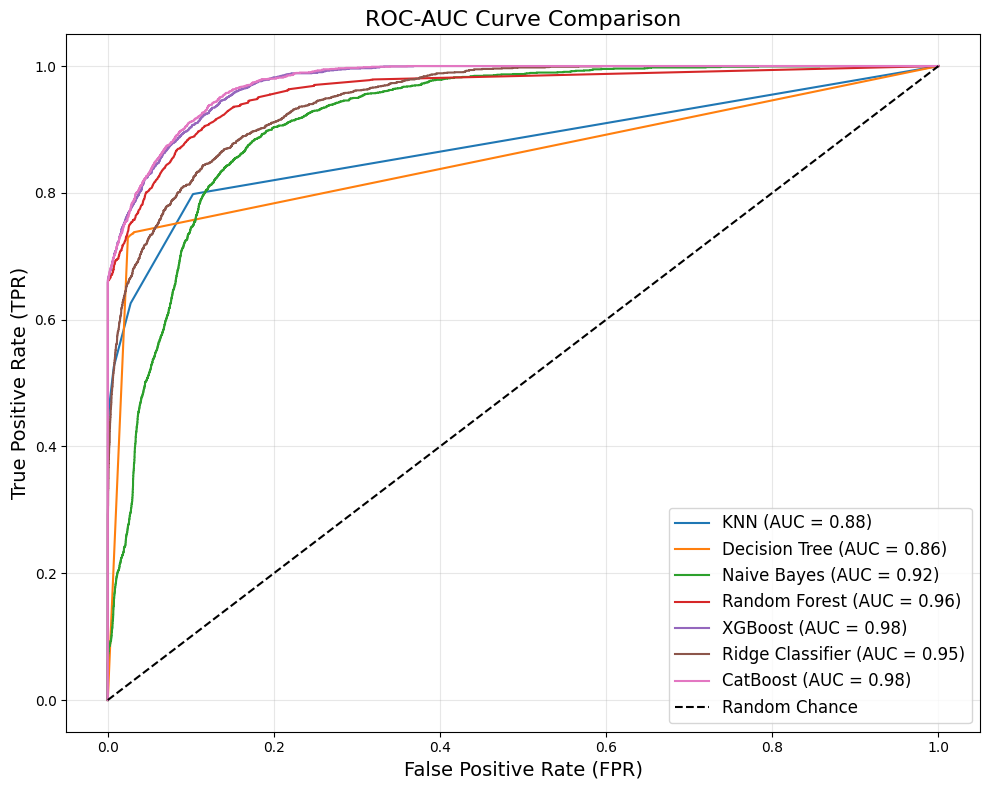

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
       # Use decision_function for RidgeClassifier and apply sigmoid
        if model_name == "Ridge Classifier":
            y_prob = expit(model.decision_function(X_test))
        else:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for other models

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=4, n_estimators=300)),
    ("XGBoost", XGBClassifier(random_state=42, eval_metric='logloss')),
    ("Ridge Classifier", RidgeClassifier()),
    ("CatBoost", CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_seed=42, cat_features=[], verbose=200))
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)


**SVM**

In [ ]:
from sklearn.svm import SVC
# Train SVM model
svm_model = SVC(probability=True, kernel='linear', random_state=3)
svm_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]



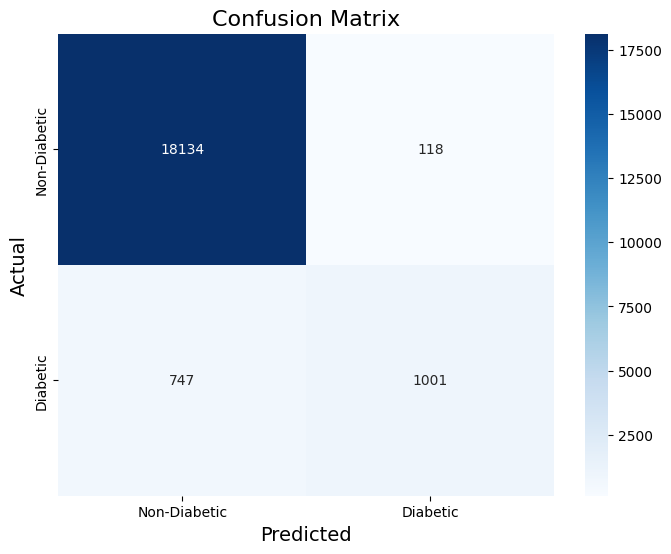

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [ ]:
# Evaluation Metrics
accuracy_svm= accuracy_score(y_test, y_pred_cat)
precision_svm = precision_score(y_test, y_pred_cat)
recall_svm = recall_score(y_test, y_pred_cat)
f1_svm = f1_score(y_test, y_pred_cat)
roc_auc_svm = roc_auc_score(y_test, y_prob_cat)
r2_svm = r2_score(y_test, y_pred_cat)
rmse_svm = sqrt(mean_squared_error(y_test, y_pred_cat))
mse_svm = mean_squared_error(y_test, y_pred_cat)
r_svm = np.corrcoef(y_test, y_pred_cat)[0, 1]

# Print the evaluation metrics
print(f"R (Pearson's correlation): {r_svm:.2f}")
print(f"R²: {r2_svm:.2f}")
print(f"RMSE: {rmse_svm:.2f}")
print(f"MSE: {mse_svm:.2f}")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
print(f"ROC-AUC: {roc_auc_svm:.2f}")

R (Pearson's correlation): 0.79
R²: 0.62
RMSE: 0.17
MSE: 0.03
Accuracy: 0.97
Precision: 0.96
Recall: 0.68
F1 Score: 0.79
ROC-AUC: 0.98


<ipython-input-77-5bb6d2699d22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


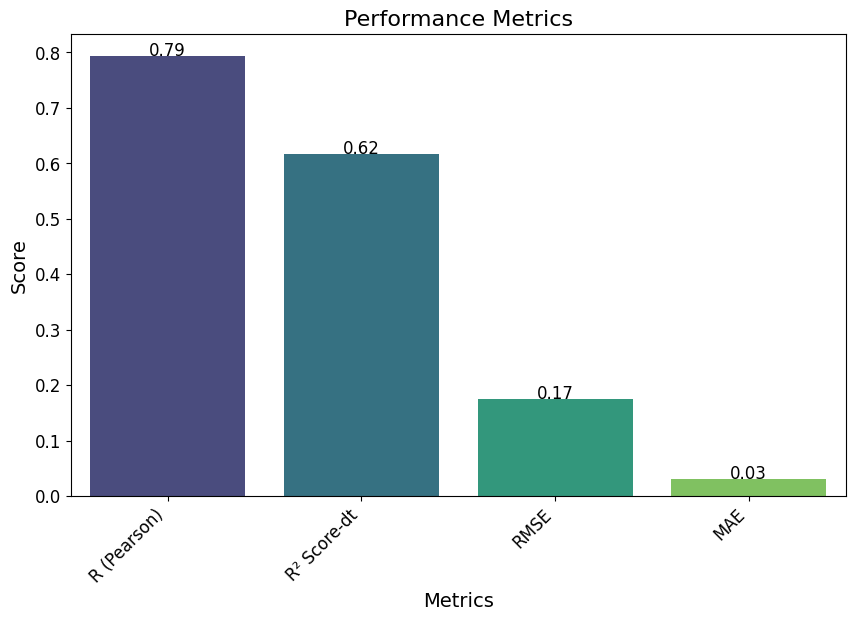

In [ ]:
# Visualization of Metrics
metrics = ['R (Pearson)', 'R² Score-dt', 'RMSE', 'MAE']
values = [r_svm, r2_svm, rmse_svm, mse_svm]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v , f"{v:.2f}", ha='center', fontsize=12)
plt.show()

In [ ]:
# Comparative Metrics Table
metrics_table = pd.DataFrame({
    "Metric": ["Pearson R", "R2 Score", "MSE", "RMSE", "Accuracy", "Recall", "Precision", "F1 Score"],
    "KNN": [r_knn, r2_knn, mae_knn, rmse_knn, acc_knn, recall_knn, prec_knn, f1_knn],
    "Decision Tree": [r_dt, r2_dt, mae_dt, rmse_dt, accuracy_dt, recall_dt, prec_dt, f1_dt],
    "Naive Bayes": [r_nb, r2_nb, mae_nb, rmse_nb, accuracy_nb, recall_nb, prec_nb, f1_nb],
    "Random Forest": [r_rf, r2_rf, mae_rf, rmse_rf, accuracy_rf, recall_rf, prec_rf, f1_rf],
    "XGBoost": [r_xg, r2_xg, mae_xg, rmse_xg, accuracy_xg, recall_xg, prec_xg, f1_xg],
    "Ridge Classifier": [r_rc, r2_rc, mse_rc, rmse_rc, accuracy_rc, recall_rc, prec_rc, f1_rc],
    "CatBoost": [r_cat, r2_cat, mse_cat, rmse_cat, accuracy_cat, recall_cat, precision_cat, f1_cat],
    "SVM": [r_svm, r2_svm, mse_svm, rmse_svm, accuracy_svm, recall_svm, precision_svm, f1_svm]
})

print(metrics_table)


      Metric       KNN  Decision Tree  Naive Bayes  Random Forest   XGBoost  \
0  Pearson R  0.656582       0.710731     0.469822       0.767854  0.792926   
1   R2 Score  0.398204       0.425159    -0.261264       0.571847  0.616982   
2        MSE  0.048000       0.045850     0.100600       0.034150  0.030550   
3       RMSE  0.219089       0.214126     0.317175       0.184797  0.174786   
4   Accuracy  0.952000       0.954150     0.899400       0.965850  0.969450   
5     Recall  0.525172       0.730549     0.615561       0.679634  0.677346   
6  Precision  0.875954       0.741149     0.445364       0.906178  0.961820   
7   F1 Score  0.656652       0.735811     0.516811       0.776724  0.794898   

   Ridge Classifier  CatBoost       SVM  
0          0.523562  0.793278  0.793278  
1          0.225188  0.617609  0.617609  
2          0.061800  0.030500  0.030500  
3          0.248596  0.174642  0.174642  
4          0.938200  0.969500  0.969500  
5          0.294622  0.675629  0.675

In [ ]:
# Save the metrics table as a CSV file
metrics_table.to_csv('comparative_metrics.csv', index=False)


0:	learn: 0.5703375	total: 27ms	remaining: 27s
200:	learn: 0.0758442	total: 3.4s	remaining: 13.5s
400:	learn: 0.0727063	total: 8.38s	remaining: 12.5s
600:	learn: 0.0700276	total: 12.3s	remaining: 8.13s
800:	learn: 0.0678824	total: 15.7s	remaining: 3.89s
999:	learn: 0.0659559	total: 19.1s	remaining: 0us


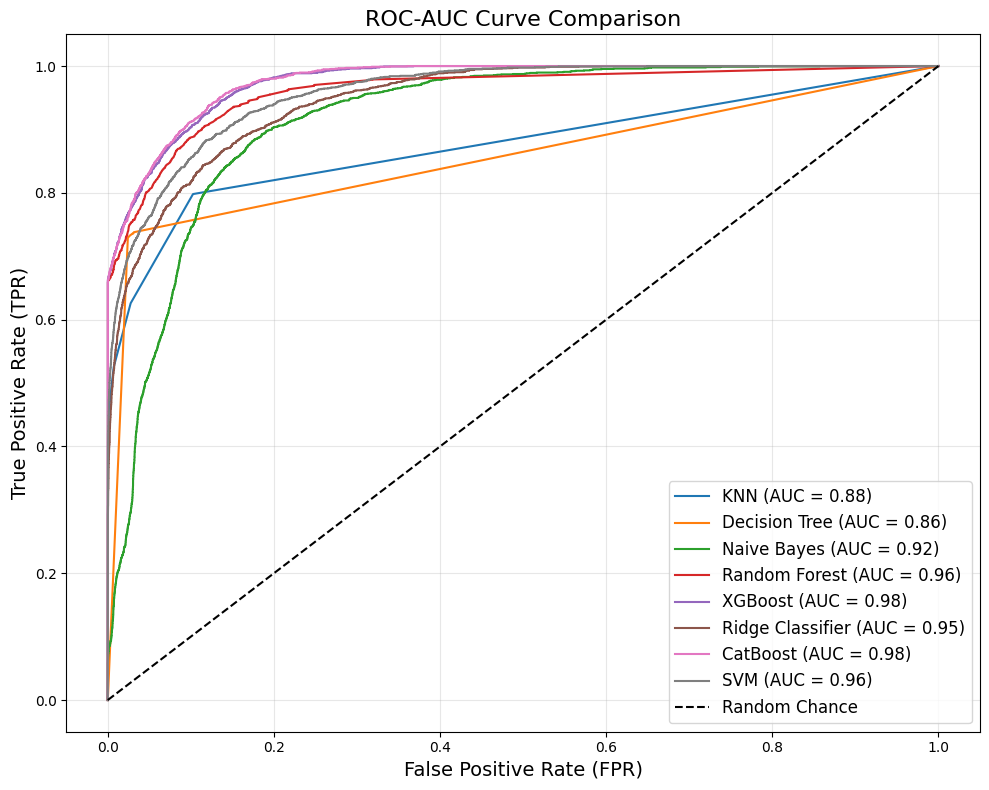

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curves
def plot_roc_auc(models):
    plt.figure(figsize=(10, 8))
    for model_name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
       # Use decision_function for RidgeClassifier and apply sigmoid
        if model_name == "Ridge Classifier":
            y_prob = expit(model.decision_function(X_test))
        else:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for other models

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC-AUC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Initialize models
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=4)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(random_state=4, n_estimators=300)),
    ("XGBoost", XGBClassifier(random_state=42, eval_metric='logloss')),
    ("Ridge Classifier", RidgeClassifier()),
    ("CatBoost", CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_seed=42, cat_features=[], verbose=200)),
    ("SVM", svm_model)
]

# Plot ROC-AUC curves for all models
plot_roc_auc(models)


CHOOSING THE BEST MODEL

In [ ]:
import pickle as pkl  # Import pickle and alias as pkl

with open('catboost_model.pkl', 'wb') as file:
    pkl.dump(catboost_model, file)  # Use pkl instead of pickle

print("Model saved as 'catboost_model.pkl'")

Model saved as 'catboost_model.pkl'


Load The saved Model

In [ ]:
# Load the saved model
with open('catboost_model.pkl', 'rb') as file:
    loaded_model = pkl.load(file)

print("Model loaded successfully")

Model loaded successfully


In [ ]:

# Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)
print(f"Predictions: {y_pred}")

In [ ]:
# Function to get user input and predict diabetes
def predict_diabetes():
    print("\nPlease provide the following details for diabetes prediction:")

    # Collecting user inputs
    try:
        age = float(input("Age (in years): "))
        hypertension = int(input("Hypertension (0 for No, 1 for Yes): "))
        heart_disease = int(input("Heart Disease (0 for No, 1 for Yes): "))
        bmi = float(input("BMI: "))
        HbA1c_level = float(input("HbA1c Level (%): "))
        blood_glucose_level = float(input("Blood Glucose Level (mg/dL): "))
    except ValueError:
        print("Invalid input! Please enter numerical values.")
        return

    # Prepare the input for the model (ensure the order matches training)
    user_data = [[age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level]]

    # Predict using the loaded model
    prediction = loaded_model.predict(user_data)
    probability = loaded_model.predict_proba(user_data)

    # Interpret the prediction
    if prediction[0] == 1:
        print("\nPrediction: The person is likely to have diabetes.")
    else:
        print("\nPrediction: The person is unlikely to have diabetes.")

    print(f"Prediction Confidence: {probability[0][1]*100:.2f}%")


In [ ]:

# Call the function
predict_diabetes()



Please provide the following details for diabetes prediction:
Age (in years): 19
Hypertension (0 for No, 1 for Yes): 0
Heart Disease (0 for No, 1 for Yes): 0
BMI: 30
HbA1c Level (%): 90
Blood Glucose Level (mg/dL): 212

Prediction: The person is likely to have diabetes.
Prediction Confidence: 99.94%
